# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [59]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact, interactive, fixed, interact_manual

In [60]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_TOKEN")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [62]:
# Import the necessary CSVs to Pandas DataFrames
nb_coordinates = pd.read_csv(
    Path("../Data/neighborhoods_coordinates.csv")
 )
nb_coordinates

sfo_neighborhoods_census = pd.read_csv(
    Path("../Data/sfo_neighborhoods_census_data.csv"), 
    index_col='year'
)

sfo_neighborhoods_census = sfo_neighborhoods_census.reset_index()

sfo_neighborhoods_census

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [63]:
# Define Panel Visualization Functions
def housing_units_per_year():
    sf_housing_units_mean = sfo_neighborhoods_census['housing_units'].groupby(sfo_neighborhoods_census.index).mean()
    min = sfo_neighborhoods_census.min()['housing_units']
    max = sfo_neighborhoods_census.max()['housing_units']
    
    housing_fig = plt.figure()
    housing_plot = sf_housing_units_mean.plot.bar(
    ylim=(min-3000, max + 3000), 
    title= "SF Mean Housing Units Sold 2010-2016", figsize = (12,8))
    plt.close(sf_housing_units_mean)
    
    return pn.pane.Matplotlib(housing_fig)

def average_gross_rent():
    average_gross_rent = sfo_neighborhoods_census['gross_rent'].groupby(sfo_neighborhoods_census.index).mean()
    
    average_gross_rent_fig = plt.figure()
    average_gross_rent.plot.line(title="Average Gross Rent", figsize=(10,5))
    plt.close(average_gross_rent_fig)

    return pn.pane.Matplotlib(average_gross_rent_fig)




def average_sales_price():
    """Average Sales Price Per Year."""
    average_sale_price = sfo_neighborhoods_census['sale_price_sqr_foot'].groupby(sfo_neighborhoods_census['year']).mean()

    average_sale_price_fig = plt.figure()
    average_sale_price.plot.line(title="Average Sale Price Per Year", figsize=(10,5))
    plt.close(average_sale_price_fig)

    return pn.pane.Matplotlib(average_sale_price_fig)

      
  


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    avg_price_neighborhood_data = sfo_neighborhoods_census.groupby([sfo_neighborhoods_census.index, "neighborhood"]).mean()

    average_price_by_neighborhood_data = pd.DataFrame(average_price_by_neighborhood_data)
    
    average_price_neighboorhood_fig = plt.figure()
    average_price_by_neighborhood_data['gross_rent'].hvplot(
        xlabel='year',
        ylabel='gross rent',
        label=' ',
        groupby='neighborhood',
        height=300,
        width=600,
)
    plt.close(average_price_neighboorhood_fig)

    return pn.pane.Matplotlib(average_price_neighboorhood_fig)

  
  



def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    top_ten_most_expensive = sfo_neighborhoods_census.groupby('neighborhood').mean().sort_values(ascending=False, by= 'sale_price_sqr_foot').head(10).drop('year', axis=1)

    top_ten_most_expensive_df = pd.DataFrame(top_ten_most_expensive)

    top_ten_most_expensive_df = top_ten_most_expensive_df.reset_index()

    top_ten_most_expensive_fig = plt.figure()
    top_ten_most_expensive_df.hvplot.bar(
        x= "neighborhood",
        y= "sale_price_sqr_foot",
        title= "10 Most Expensive Neighborhoods in San Francisco, CA",
        height=350,
        rot= 45
    )

    plt.close(top_ten_most_expensive_fig)
    
    return pn.pane.Matplotlib(top_ten_most_expensive_fig)


def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    avg_price_neighborhood_data = sfo_neighborhoods_census.groupby([sfo_neighborhoods_census.index, "neighborhood"]).mean() 

    avg_price_neighborhood_data.head(10)

    avg_price_neighborhood_data_fig = plt.figure()
    avg_price_neighborhood_data.hvplot.bar("year", ["sale_price_sqr_foot", "gross_rent"], groupby= "neighborhood", width= 1600, height= 500)
    plt.close(avg_price_neighborhood_data_fig)

    return pn.pane.Matplotlib(avg_price_neighborhood_data_fig)
    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    top_ten_most_expensive = sfo_neighborhoods_census.groupby('neighborhood').mean().sort_values(ascending=False, by= 'sale_price_sqr_foot').head(10).drop('year', axis=1)

    top_ten_most_expensive_df = pd.DataFrame(top_ten_most_expensive)

    top_ten_most_expensive_df = top_ten_most_expensive_df.reset_index()

    parallel_coordinates_data_fig = plt.figure()
    px.parallel_coordinates(
        top_ten_most_expensive_df,
        color="sale_price_sqr_foot",
        title="Parallel Coordinates of Most Expensive Neighborhoods in San Francisco"
    )
    plt.close(parallel_coordinates_data_fig)
    return pn.pane.Matplotlib(parallel_coordinates_data_fig)


def parallel_categories():
    """Parallel Categories Plot."""
    
    top_ten_most_expensive = sfo_neighborhoods_census.groupby('neighborhood').mean().sort_values(ascending=False, by= 'sale_price_sqr_foot').head(10).drop('year', axis=1)

    top_ten_most_expensive_df = pd.DataFrame(top_ten_most_expensive)

    top_ten_most_expensive_df = top_ten_most_expensive_df.reset_index()

    parallel_categories_data_fig = plt.figure()
    px.parallel_coordinates(
        top_ten_most_expensive_df,
        dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
        color="sale_price_sqr_foot",
        title="Parallel Categoriesdinates of Most Expensive Neighborhoods in San Francisco"
    )
    plt.close(parallel_categories_data_fig)
    return pn.pane.Matplotlib(parallel_categories_data_fig)


def neighborhood_map():
    """Neighborhood Map."""

    


def sunburst():

    top_ten_most_expensive = sfo_neighborhoods_census.groupby('neighborhood').mean().sort_values(ascending=False, by= 'sale_price_sqr_foot').head(10).drop(sfo_neighborhoods_census.index, axis=1)

    top_ten_most_expensive_df = pd.DataFrame(top_ten_most_expensive)

    top_ten_most_expensive_df = top_ten_most_expensive_df.reset_index()

    sunburst_data_fig = plt.figure()
    px.sunburst(
    top_ten_most_expensive_df,
    path = ["year","neighborhood"],
    values = "sale_price_sqr_foot",
    color="gross_rent", 
    hover_data=["gross_rent"],
    color_continuous_scale="blues",
    height = 700,
    )
    plt.close(sunburst_data_fig)
    return pn.pane.Matplotlib(sunburst_data_fig)
   


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

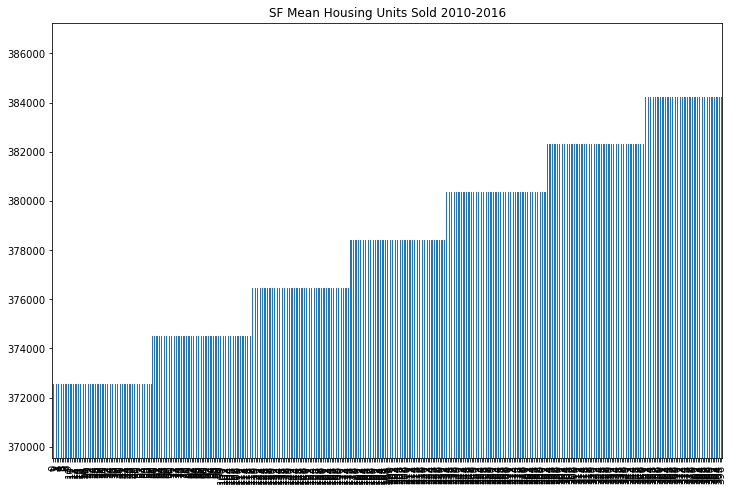

In [68]:
# Create a Title for the Dashboard
title = "Real Estate Data of San Francisco from 2010-2016"


# Create a tab layout for the dashboard
welcome = pn.Row(pn.Column(title), neighborhood_map())
yearly_market_analysis_tab = pn.Row(housing_units_per_year(), average_gross_rent(), average_sales_price())
neighborhood_analyis_tab = pn.Column(interact(average_price_by_neighborhood, neighborhood= neighborhood_choice), top_most_expensive_neighborhoods())
parallel_plots_analysis_tab = pn.Column(
    parallel_categories(),
    parallel_coordinates()
)
sunburst_tab = pn.Column(sunburst())


# Create the dashboard
san_francisco_dashboard = pn.Tabs(("Welcome", welcome),
    ("Yearly Market Analysis", yearly_market_analysis_tab),
    ("Neighborhood Analysis", neighborhood_analyis_tab),
    ("Interactive Market Analysis by Neighborhood", parallel_plots_analysis_tab),
    ("Sunburst", sunburst_tab)
)


## Serve the Panel Dashboard

In [69]:
# Serve the# dashboard
san_francisco_dashboard.servable()

NameError: name 'san_francisco_dashboard' is not defined

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [ ]:
# housing_units_per_year()

In [ ]:
# average_gross_rent()

In [ ]:
# average_sales_price()

In [ ]:
# average_price_by_neighborhood()

In [ ]:
# top_most_expensive_neighborhoods()

In [ ]:
# most_expensive_neighborhoods_rent_sales()

In [ ]:
# neighborhood_map().show()

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()